In [72]:
#!pip install HTML

In [73]:
# Bibliotecas para manipualçao e visualização dos dados
import numpy as np
import matplotlib.pyplot as plt

# Biblioteca para temporizar as operações
import time 

from matplotlib.animation import FuncAnimation
from matplotlib.cm import get_cmap
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
# plt.style.use('ggplot')


##### Métricas de erro para serem testadas:

ME = ERRO MÉDIO = soma(erros)/tamanho

MAE = ERRO ABSOLUTO MÉDIO = módulo da soma dos erros/tamanho

RMSE = DESVIO PADRÃO DO ERRO = raiz quadrada do (erro^2/tamanho)

MAPE = DIFERENÇA PERCENTUAL ABSOLUTA DE ERRO = soma dos (erros/valor_desejado)/tamanho

Erro quadrático

In [74]:
#Criando vetores iniciais de posição e velocidade(TÁ OK) -> Testado
def PV_iniciais(K,n):
    """
    Cria a posição e as velocidades iniciais de cada pássaro(indivíduo)
    > K: Tamanho da população <int>
    > n: Número de dimensões do problema <int>
    Retorna a posiçao do passaro (pos_bird) de K colunas e n linhas e Retorna a velocidade do passaro (vel_bird) de K colunas e n linhas
    """
    pos_bird = np.random.uniform(lim_min,lim_max,size = (K,n))
    vel_bird = np.random.uniform(lim_min,lim_max,size = (K,n))
    return pos_bird,vel_bird

#Criando o valor dos pesos para cada partícula: introduzindo "personalidade" as partículas (Tá Ok, Testado)
def r1_r2(K,n):
    """
    Cria as variaveis r1 e r2 que são de tamanho (K linhas, n colunas). Referem-se ao multiplicador aleatório que simula a personalidade de cada indivíduo
    > K: Tamanho da população <int>
    > n: Número de dimensões do problema <int>
    """
    r1 = np.random.uniform(0,1,size=(K,n))
    r2 = np.random.uniform(0,1, size=(K,n))
    return r1,r2
    
#Função objetivo: Função a ser testada + restrições se necessário
def fitness(particulas):
    """
    Função de avaliação para o algoritmo de otimização. Deve ser desenhada de acordo com o problema!
    > particulas: a população de individuos <np.array>
    Retorna um valor de fitness para cada individuo testado
    """
    fit = -20*np.exp(-0.2*np.sqrt(0.5*(particulas[:,0]**2+particulas[:,1]**2))) - np.exp(0.5*(np.cos(2*np.pi*particulas[:,0])+np.cos(2*np.pi*particulas[:,1]))) + np.exp(1)+20
    return np.array(fit)

#Vetor das melhores posição da historia das iterações de cada partícula
def best_local(pos_bird, fit, fit_best_l, pos_best_l):
    """
    Função utilizada para armazenar o melhor valor de fitness e posição de cada pássaro respectivamente.
    > pos_bird: Individuos <np.array>
    > fit: Sequencia do resultado do Fitness <np.array>
    > fit_best_l: Memoria dos melhores desempenhos locais <np.array>
    > pos_best_l: Memoria da posição dos melhores desempenhos locais <np.array>
    Retorna um array do melhor desempenho local e um array da posição do melhor desempenho local.
    """
    pos_best_l[fit<fit_best_l] = pos_bird[fit<fit_best_l]
    fit_best_l[fit<fit_best_l] = fit[fit<fit_best_l]
    return fit_best_l, pos_best_l
            
#Melhor posição da história
def best_global(pos_bird, fit, fit_best_g, pos_best_g):
    """
    Função utilizada para armazenar o melhor valor de fitness e posição global.
    > pos_bird: Individuos <np.array>
    > fit: Sequencia do resultado do Fitness <np.array>
    > fit_best_g: Memoria dos melhores desempenhos locais <float>
    > pos_best_g: Memoria da posição dos melhores desempenhos locais <np.array>
    Retorna um float do melhor desempenho global e um array da posição do melhor desempenho local.
    """
    pos_best_g = pos_bird[np.argmin(fit)] if min(fit) < fit_best_g else pos_best_g
    fit_best_g = min(fit) if min(fit) < fit_best_g else fit_best_g
    return fit_best_g, pos_best_g

#Atualização das posições e velocidades 
def att_xev(pos_bird, vel_bird, pl_best, pg_best, r1, r2, c1, c2, w):
    """
    Função de atualizaçao das particulas/passaros/individuos. Utiliza-se as expressões padrões do PSO.
    > pos_bird: posição das particulas <np.array>
    > vel_bird: velocidades das particulas <np.array>
    > pl_best: memoria da melhor posição local de cada pássaro <np.array>
    > gl_best: memoria da melhor posição global de cada pássaro <np.array>
    > r1: lista de números aleatórios entre 0 e 1 para influencia local <np.array>
    > r2: lista de números aleatórios entre 0 e 1 para influencia global <np.array>
    > c1: peso local <float>
    > c2: peso global <float>
    > w: peso de inercia <float>
    """
    vel_novo = w*vel_bird + c1*r1*(pl_best-pos_bird)+c2*r2*(pg_best-pos_bird)
    pos_novo = pos_bird + vel_novo
    return pos_novo, vel_novo


In [75]:
#Variáveis Referentes ao PSO
n= 2#dimensões
K = 10*n #Tamanho da população de passáros
c1 = 1 #constante de aceleração individual
c2 = 0.85 #constante de aceleração global
w = 0.3 #coeficiente de inércia
cont=1 #Contador de iterações
lim_min = -10
lim_max = 10
iter_max = 100
erro_stop = 0.0000001
lista_grafico = []
cont_estag = 0
gbest_ad = 0
posx_grafico = []
posy_grafico = []
posz_grafico = []


In [76]:
# Laço Principal
ini = time.time()
pos_bird,vel_bird = PV_iniciais(K,n)
while True:
    r1,r2 = r1_r2(K, n)
    fit = fitness(pos_bird)
    
    if cont==1:
      fit_best_global = np.min(fit)
      best_g = pos_bird[np.argmin(fit)]
      fit_best_local = fit
      best_l = pos_bird
    else:
      fit_best_local, best_l = best_local(pos_bird, fit, fit_best_local, best_l)
      fit_best_global, best_g = best_global(pos_bird, fit, fit_best_global, best_g)

    lista_grafico.append(fit_best_global)
    posx_grafico.append(list(pos_bird[:,0]))
    posy_grafico.append(list(pos_bird[:,1]))
    posz_grafico.append(list(fit))
    
    pos_bird, vel_bird = att_xev(pos_bird, vel_bird, best_l, best_g, r1, r2, c1, c2, w)
    if cont == iter_max or fit_best_global <= erro_stop:
        break
    cont+=1
    
fim = time.time()

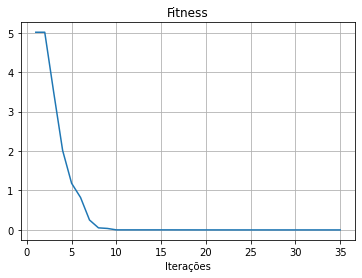

In [77]:
plt.plot(list(range(1,1+cont)),lista_grafico)
plt.title('Fitness')
plt.xlabel('Iterações')
plt.grid()
plt.show()

In [78]:
print('Posição do passáro melhor colocado: ', best_g)
print('Desempenho: ', fit_best_global)
print('Número de Iterações: ', cont)
print("Tempo de simulação: ", np.round(fim - ini,4), 'segundos')

Posição do passáro melhor colocado:  [-2.03664619e-09 -2.48830240e-08]
Desempenho:  7.061519013973339e-08
Número de Iterações:  35
Tempo de simulação:  0.0105 segundos


In [79]:
x= np.linspace(-10,10,100)
y= np.linspace(-10,10,100)
xarray, yarray = np.meshgrid(x,y)
zarray = -20*np.exp(-0.2*np.sqrt(0.5*(xarray**2+yarray**2))) - np.exp(0.5*(np.cos(2*np.pi*xarray)+np.cos(2*np.pi*yarray))) + np.exp(1)+20 

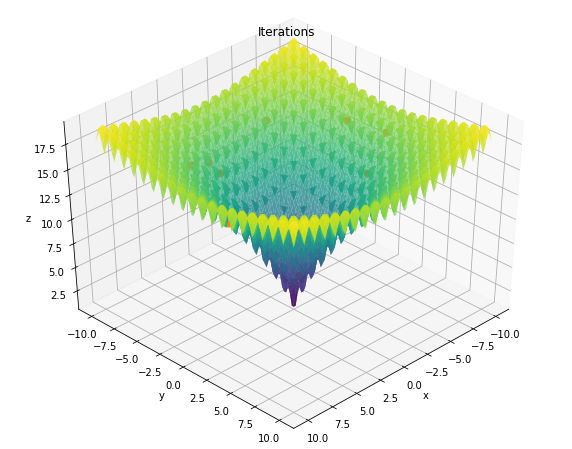

In [80]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xarray, yarray, zarray, rstride=1, cstride=1, cmap='viridis', edgecolor='none',alpha=0.8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
scat, = ax.plot([], [], [], "o", markersize=7)

def animate(i):
      scat.set_data(posx_grafico[i],posy_grafico[i])
      scat.set_3d_properties(posz_grafico[i])

anim = FuncAnimation(fig, animate, interval=200, frames=len(posx_grafico)-1)

plt.grid() 
plt.title('Iterations')
ax.view_init(azim =45,elev = 40) 

In [81]:
HTML(anim.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.